In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('dataframe.csv')

In [2]:
state_code = 'CA'
data = []

# Filtering by state code
for index, row in df.iterrows():
    if(row['state_code'] != state_code):
        continue
    data.append([row['date'], row['cases'], row['mask_usage'], row['mobility']])

data = np.array(data)

In [3]:
def get_train_data_for(data, i, days_before):
    train = []
    
    for j in range(i-days_before, i):
        train.append(data[j, 1].astype('float'))
        train.append(data[j, 2].astype('float'))
        train.append(data[j, 3].astype('float'))
    
    return train

def get_training_and_test_data_from_days_before(data, days_before, normalize=True):
    X = []
    y = []
    
    for i in range(days_before, len(data)):
        previous_days_data = get_train_data_for(data, i, days_before)
        previous_days_data.append(data[i, 2].astype('float'))
        previous_days_data.append(data[i, 3].astype('float'))
        
        X.append(np.array(previous_days_data))
        y.append(data[i, 1].astype('float'))

    X = np.array(X)
    y = np.array(y).astype('float')
    
    #normalization
    if normalize:
        X[:, 0] = X[:, 0]/(X[:, 0].max())
        X[:, 1] = X[:, 1]/(X[:, 1].max())
        X[:, 2] = X[:, 2]/(X[:, 2].max())
        y = y/y.max()
    
    return X, y

In [4]:
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split

#test predictions
X, y = get_training_and_test_data_from_days_before(data, 1, False)
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state = 0)

model = linear_model.LinearRegression()
model.fit(Xtrain, ytrain)
pred = model.predict(Xtest)

In [5]:
#visualize predictions against actual values
for i in range(len(ytest)):
    print(pred[i], ytest[i])

4570.835947543732 4191.0
5454.302247591113 4094.0
2872.589066290442 3062.0
3830.8474996696314 2940.0
2606.502078994905 2764.0
4492.416437740656 3055.0
7574.609225884444 6893.0
4612.787069106722 4014.0
3912.044331801095 2378.0
2939.579649744075 2950.0
3369.5973184588656 3707.0
4691.107524368708 5338.0
2899.222190548462 3474.0
7233.082063086302 7212.0
4318.097764287406 3449.0


min:  0.008477684427420742


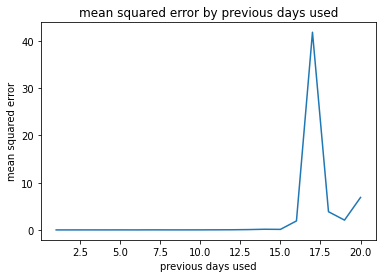

In [6]:
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score

mean_squared_errors = []
days = [day for day in range(1, 21)]

for prev_days in days:
    X, y = get_training_and_test_data_from_days_before(data, prev_days)
    model = linear_model.LinearRegression()
    scores = cross_val_score(model, X, y, cv=10, scoring='neg_mean_squared_error')
    mean_squared_errors.append(-scores.mean())

mean_squared_errors = np.array(mean_squared_errors)

plt.figure()
plt.errorbar(days, mean_squared_errors)
plt.xlabel('previous days used')
plt.ylabel('mean squared error')
plt.title("mean squared error by previous days used")

print('min: ', mean_squared_errors.min())

min:  0.008446489171553235


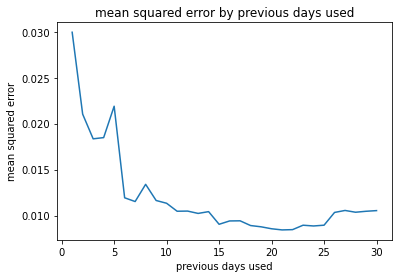

In [7]:
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.svm import SVR

mean_squared_errors = []
days = [day for day in range(1, 31)]

for prev_days in days:
    X, y = get_training_and_test_data_from_days_before(data, prev_days)
    model = SVR()
    scores = cross_val_score(model, X, y, cv=10, scoring='neg_mean_squared_error')
    mean_squared_errors.append(-scores.mean())

mean_squared_errors = np.array(mean_squared_errors)

plt.figure()
plt.errorbar(days, mean_squared_errors)
plt.xlabel('previous days used')
plt.ylabel('mean squared error')
plt.title("mean squared error by previous days used")

print('min: ', mean_squared_errors.min())

min:  0.004039931817221089


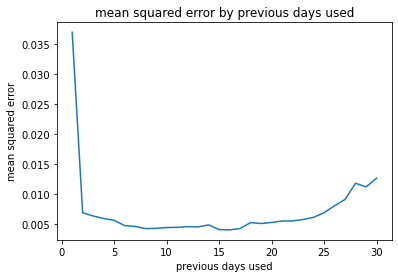

In [8]:
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Lasso

mean_squared_errors = []
days = [day for day in range(1, 31)]

for prev_days in days:
    X, y = get_training_and_test_data_from_days_before(data, prev_days)
    model = Lasso()
    scores = cross_val_score(model, X, y, cv=10, scoring='neg_mean_squared_error')
    mean_squared_errors.append(-scores.mean())

mean_squared_errors = np.array(mean_squared_errors)

plt.figure()
plt.errorbar(days, mean_squared_errors)
plt.xlabel('previous days used')
plt.ylabel('mean squared error')
plt.title("mean squared error by previous days used")

print('min: ', mean_squared_errors.min())

min:  0.0054769598277322005


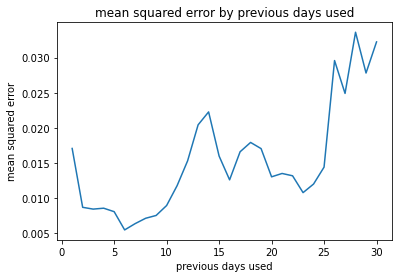

In [9]:
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Ridge

mean_squared_errors = []
days = [day for day in range(1, 31)]

for prev_days in days:
    X, y = get_training_and_test_data_from_days_before(data, prev_days)
    model = Ridge()
    scores = cross_val_score(model, X, y, cv=10, scoring='neg_mean_squared_error')
    mean_squared_errors.append(-scores.mean())

mean_squared_errors = np.array(mean_squared_errors)

plt.figure()
plt.errorbar(days, mean_squared_errors)
plt.xlabel('previous days used')
plt.ylabel('mean squared error')
plt.title("mean squared error by previous days used")

print('min: ', mean_squared_errors.min())